## DIGITS Decision Tree

In [2]:
%matplotlib inline

import math
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection as cv
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from statsmodels.stats.proportion import proportion_confint
import sklearn.neighbors as nb

In [3]:
digits = load_digits()

X = digits.data
y = digits.target
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size = .3, random_state = 1)

### Train Naive Bayes to compare results

In [40]:
clf = GaussianNB()
prediction = clf.fit(X_train, y_train).predict(X_test)

print(confusion_matrix(y_test, prediction))
print(f"\nAccuracy: {accuracy_score(y_test, prediction)}")

print(classification_report(y_test, prediction))

epsilon = accuracy_score(y_test, prediction)
print(epsilon)
# This function should return the confidence interval, but it seems to have a bug in the last version
# in order to use it should be used a previous version or wait until is fixed with next release
#proportion_confint(
#    count = int(np.floor(epsilon * X_test.shape[0])), 
#    nobs = X_test.shape[0], 
#    alpha = 0.05, 
#    method = "binom_test"
#)

[[54  1  0  0  3  0  0  1  0  0]
 [ 0 42  1  0  0  0  0  0  6  0]
 [ 0  5 32  0  0  0  0  0 12  0]
 [ 0  2  2 51  0  1  0  3  5  0]
 [ 1  4  0  0 54  0  0  1  1  0]
 [ 0  2  0  1  0 41  0  2  1  0]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 57  0  0]
 [ 0 10  0  1  0  0  0  1 34  0]
 [ 0  2  0  1  2  3  1  7  8 33]]

Accuracy: 0.8314814814814815
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        59
           1       0.62      0.86      0.72        49
           2       0.91      0.65      0.76        49
           3       0.94      0.80      0.86        64
           4       0.92      0.89      0.90        61
           5       0.91      0.87      0.89        47
           6       0.98      1.00      0.99        51
           7       0.79      1.00      0.88        57
           8       0.51      0.74      0.60        46
           9       1.00      0.58      0.73        57

    accuracy                           0.83

### Train and Print A Decision Tree

In [20]:
clf = DecisionTreeClassifier(criterion = "entropy")
clf = clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, prediction))
print(f"\nAccuracy: {accuracy_score(y_test, prediction)}\n")
print(classification_report(y_test, prediction))
epsilon = accuracy_score(y_test, prediction)

0.8648148148148148
[[55  0  0  0  2  1  0  0  0  1]
 [ 0 40  1  2  1  1  0  0  2  2]
 [ 0  1 42  0  0  0  2  0  4  0]
 [ 0  1  2 53  0  2  0  0  1  5]
 [ 0  3  2  0 49  2  1  2  2  0]
 [ 0  0  0  2  1 42  0  1  0  1]
 [ 2  0  0  0  2  0 46  1  0  0]
 [ 0  0  0  0  2  0  0 54  0  1]
 [ 0  1  0  5  0  0  0  4 36  0]
 [ 0  1  1  2  0  2  0  1  0 50]]

Accuracy: 0.8648148148148148

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        59
           1       0.85      0.82      0.83        49
           2       0.88      0.86      0.87        49
           3       0.83      0.83      0.83        64
           4       0.86      0.80      0.83        61
           5       0.84      0.89      0.87        47
           6       0.94      0.90      0.92        51
           7       0.86      0.95      0.90        57
           8       0.80      0.78      0.79        46
           9       0.83      0.88      0.85        57

    accuracy           

0.8351851851851851
[[55  0  0  0  3  0  0  0  0  1]
 [ 0 41  2  0  1  0  0  2  3  0]
 [ 0  1 43  0  0  0  2  0  3  0]
 [ 0  1  3 44  0  2  0  0  6  8]
 [ 0  2  2  3 49  2  0  0  2  1]
 [ 0  3  0  0  1 42  0  0  0  1]
 [ 0  0  0  1  4  0 46  0  0  0]
 [ 0  0  0  1  2  0  0 54  0  0]
 [ 0  2  2  1  2  1  0  1 36  1]
 [ 1  3  0  2  0  2  0  6  2 41]]

Accuracy: 0.8351851851851851

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        59
           1       0.77      0.84      0.80        49
           2       0.83      0.88      0.85        49
           3       0.85      0.69      0.76        64
           4       0.79      0.80      0.80        61
           5       0.86      0.89      0.88        47
           6       0.96      0.90      0.93        51
           7       0.86      0.95      0.90        57
           8       0.69      0.78      0.73        46
           9       0.77      0.72      0.75        57

    accuracy           

<Figure size 80000x8000 with 0 Axes>

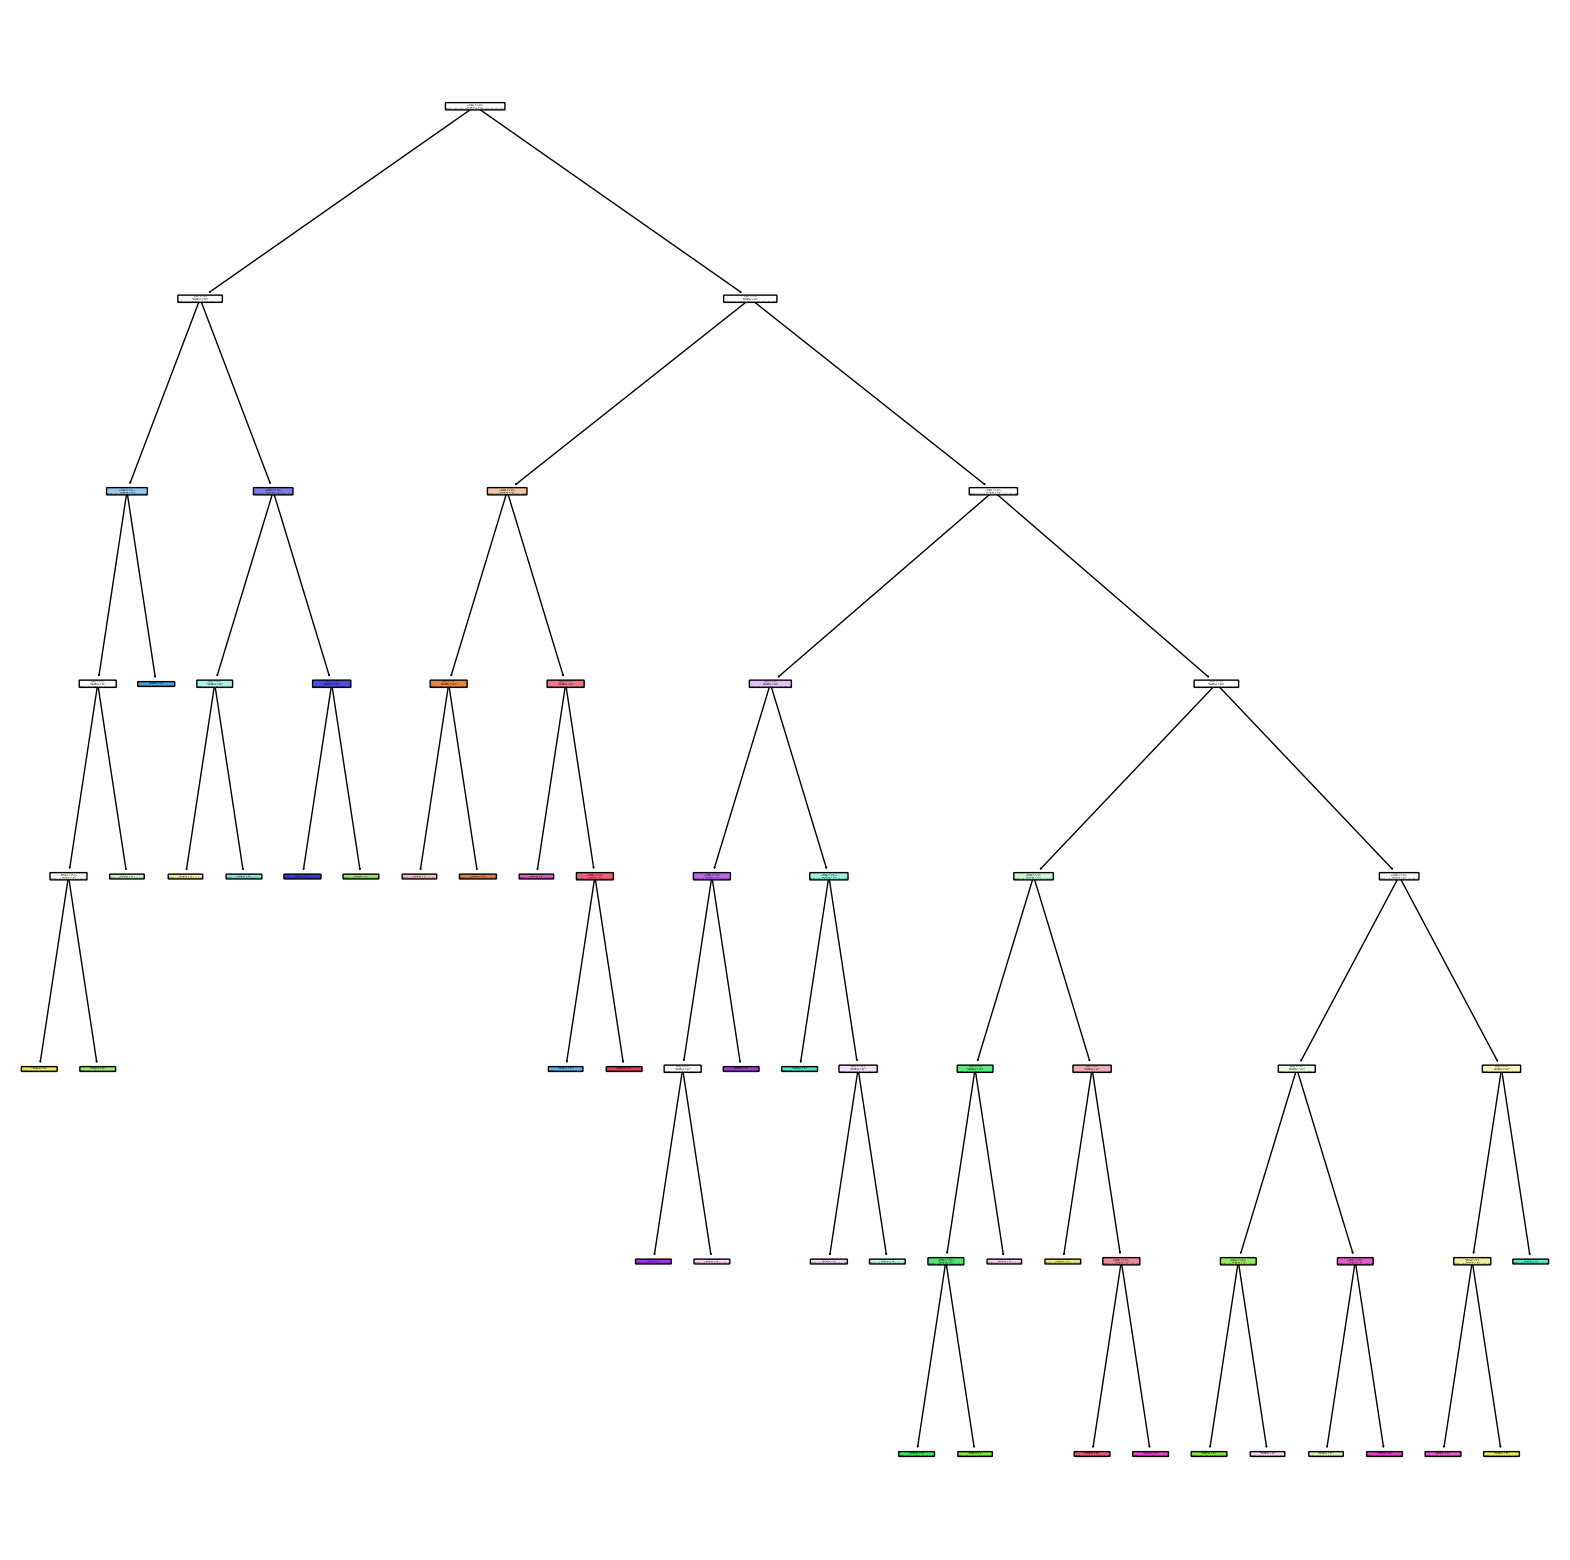

In [25]:
clf = DecisionTreeClassifier(
    criterion = "entropy", 
    min_samples_split = 4,
    min_impurity_decrease = 0.02
)
clf = clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, prediction))
print(f"\nAccuracy: {accuracy_score(y_test, prediction)}\n")
print(classification_report(y_test, prediction))
epsilon = accuracy_score(y_test, prediction)

fig = plt.gcf()
fig.set_size_inches(800, 80)
plt.figure(figsize=(20,20))
plot_tree(clf, filled=True,rounded=True)
#fig.savefig('tree.png')
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV

params = {
    "min_impurity_decrease": list(np.linspace(0,0.5,21)),
    "min_samples_split":list(range(2,20,11))
}
clf = GridSearchCV(
    DecisionTreeClassifier(criterion = "entropy"), 
    param_grid = params,
    cv = 10,  # OBS: # If cv is integer, by default is Stratifyed 
    n_jobs = -1
) 
clf.fit(X_train, y_train)
print(f"Best Params = {clf.best_params_}  -  Accuracy = {clf.best_score_}")

Best Params = {'min_impurity_decrease': 0.0, 'min_samples_split': 2}  -  Accuracy = 0.8496190476190476


In [39]:
cdt= DecisionTreeClassifier(
    criterion = "entropy", 
    min_samples_split = clf.best_params_["min_samples_split"],
    min_impurity_decrease = clf.best_params_["min_impurity_decrease"]
)
clf = cdt.fit(X_train, y_train)
pred = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(f"prediction: {[pred]}")
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, pred))
print(f"\nAccuracy: {accuracy_score(y_test, pred)}\n")
print(classification_report(y_test, pred))

epsilon = accuracy_score(y_test, pred)
print(epsilon)
#print("Interval of confidence:", proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))

prediction: [array([1, 5, 0, 7, 1, 0, 7, 8, 5, 4, 9, 2, 7, 8, 4, 4, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 3, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 8, 3, 4, 3, 4, 0, 4, 7, 0, 5, 4, 5, 2, 8, 7, 0, 5, 1,
       8, 5, 3, 4, 0, 3, 7, 4, 3, 6, 2, 9, 7, 5, 2, 5, 3, 4, 6, 5, 5, 2,
       5, 8, 6, 6, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 5, 2,
       3, 2, 3, 1, 1, 9, 1, 2, 0, 4, 8, 5, 2, 4, 7, 6, 7, 6, 6, 1, 9, 5,
       6, 9, 8, 3, 4, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 8, 3, 0, 7, 6, 5, 6, 4, 9, 5, 6, 0, 6, 1, 0, 9, 9, 6, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 9, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 4, 1, 0, 3, 2, 0, 9, 9, 3, 9, 1, 5, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 4, 0, 3, 9, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 1, 7, 4, 0, 3, 6, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 8, 5, 2, 7, 0, 9, 0, 5, 4, 0, 1, 4, 6, 4, 4, 8,
       5, 0, 2, 6, 0, 1, 6, 2, 0, 9, 5